# __Dog Breed Recognition Model__

## __Introduction__

The field of image recognition has gained increasing importance across various applications, including security systems and medical diagnostics. In this personal project, the power of deep learning and computer vision techniques has been harnessed to develop an algorithm capable of classifying dog breeds from images. This initiative not only highlights the potential of AI in parsing complex visual data but also offers a fun and interactive avenue for technology engagement.

__Possible benefits of this type of algorithm:__

For Dog Owners and Enthusiasts: Provides an entertaining and educational tool for learning about different dog breeds, thereby enhancing the understanding and appreciation of canine diversity.

For Veterinarians and Animal Rescuers: Aids in swiftly identifying a dog's breed, which is pivotal for healthcare, nutritional advice, and facilitating the adoption process for rescued animals.

For the Field of Computer Vision: Illustrates the effectiveness of image classification algorithms in recognizing not just objects but the subtle differences within categories, contributing to advancements in AI research.

__Challenges:__

Breed Variability: Dogs are a highly diverse species with over 300 recognized breeds, each with unique features. Capturing and classifying this variability accurately is a significant challenge.

Image Quality and Diversity: The algorithm must be robust enough to handle images of varying quality and backgrounds, including those taken in different lighting conditions or from unusual angles.

Similarity Between Breeds: Some dog breeds look very similar, making it difficult for the algorithm to distinguish between them accurately.

__Approach:__

The MobileNetV2, a pre-trained convolutional neural network known for its efficiency and accuracy in image classification tasks, was chosen as the model's backbone. It was further fine-tuned on a dataset of dog images to specialize in breed recognition. This methodology employs transfer learning, markedly reducing the time and data necessary to train an effective model significantly.

## __Information about the data used in this project__
The datasets used in this project was obtained from the public datasets section on Kaggle at the link https://www.kaggle.com/datasets/gpiosenka/70-dog-breedsimage-data-set.

### __First data view__

In [14]:
# Third-party imports
import os # For interaction with the operating system
import numpy as np # Provides support for efficient numerical computations
import matplotlib.pyplot as plt # For plotting graphs and visualizing data
from PIL import Image # Used for opening, manipulating, and saving many different image file formats
import pandas as pd  # For data manipulation
from tensorflow.keras.applications import MobileNetV2  # Pre-trained model for image classification
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense  # Layers for building the model
from tensorflow.keras.models import Model  # For creating the model
from tensorflow.keras.optimizers.legacy import Adam as LegacyAdammodel  # Optimizer for model training
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array  # For image data augmentation and loading

In [2]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('data/dogs.csv')

# Print shape of DataFrame to see number of rows and columns
print(df.shape)

# Display firts 5 rows of the DataFrame
df.head()

(9346, 3)


,filepaths,labels,data set
0,train/Afghan/001.jpg,Afghan,train
1,train/Afghan/002.jpg,Afghan,train
2,train/Afghan/003.jpg,Afghan,train
3,train/Afghan/004.jpg,Afghan,train
4,train/Afghan/005.jpg,Afghan,train


In [3]:
# Print information about the DataFrame including data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9346 entries, 0 to 9345
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   filepaths  9346 non-null   object
 1   labels     9346 non-null   object
 2   data set   9346 non-null   object
dtypes: object(3)
memory usage: 219.2+ KB


In [4]:
# Count the total number of rows in the CSV
csv_total_lines = len(df)

# Define a function to count the total number of .jpg files in a given directory
def count_total_jpg_files(base_path):
    total_files = 0
    # Walk through the directory
    for root, dirs, files in os.walk(base_path):
        # Increment count for each .jpg file
        total_files += sum(1 for file in files if file.endswith('.jpg'))
    return total_files

# Count total .jpg files in the 'data' directory
total_folder_files = count_total_jpg_files('data')

# Compare the count of .jpg files with the number of rows in the CSV
if total_folder_files == csv_total_lines:
    # If counts match, print confirmation message
    print(f"Everything is right! Number of images: {total_folder_files}, Number of lines in CSV: {csv_total_lines}.")
else:
    # If counts don't match, print discrepancy message
    print(f"Differences found! Number of images: {total_folder_files}, Number of lines in CSV: {csv_total_lines}.")

Everything is right! Number of images: 9346, Number of lines in CSV: 9346.


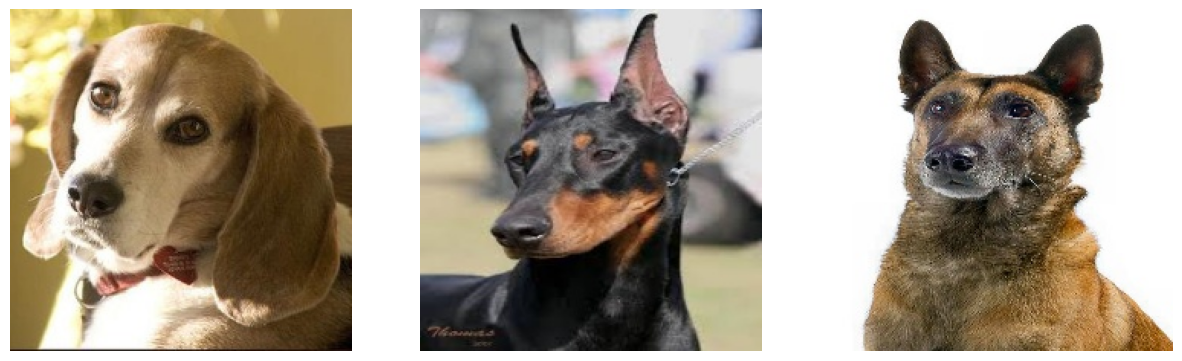

In [5]:
# Paths to images
images_paths = [
    'data/test/Beagle/01.jpg',
    'data/train/Doberman/001.jpg',
    'data/valid/Malinois/01.jpg'
]

# Setting the picture size to ensure images are not too small or overlapping
plt.figure(figsize=(15, 5))

# Loop to load and display each image
for i, image_path in enumerate(images_paths, start=1):
    img = Image.open(image_path)  # Opening the image
    plt.subplot(1, 3, i)  # Setting the image position (1 row, 3 columns, position i)
    plt.imshow(img)
    plt.axis('off')  # Removing the axes

plt.show()

It was possible to verify that there are no apparent problems with the data. The number of observations in the CSV file matches the number of images in the training, validation and test folders.

Above, some images were plotted to illustrate the types of images that will be worked with.

### __Model training and performance evaluation__

Data Preparation and Augmentation: TensorFlow's ImageDataGenerator was utilized for loading and preprocessing image data, as well as augmenting the training dataset. Data augmentation, involving transformations such as rotation, width and height shifts, shear, zoom, and horizontal flipping, helps prevent overfitting and enhances the model's generalization by exposing it to a wider variety of training examples. The validation and testing sets were limited to rescaling pixel values to maintain consistency with the training data.

Generator Setup: Generators for training, validation, and testing datasets were established using the flow_from_directory method. This method automatically labels images based on directory structure, resizes them to a uniform size (224x224 pixels, expected by MobileNetV2), and sets the batch size. The class_mode 'categorical' enables multi-class classification, crucial for distinguishing among various dog breeds.

Model Architecture: MobileNetV2 was chosen as the base model for its efficiency in image classification tasks. By excluding the top layer (include_top=False), the network is tailored for the specific classification task, leveraging pre-trained weights and features from ImageNet while customizing the output layer for the dataset.

Custom Classification Layers: A Global Average Pooling layer was added atop the base model to reduce feature map dimensionality, followed by a Dense layer with 1024 neurons (ReLU activation) for deep feature learning. The final layer is a Dense layer with neurons equal to the number of dog breeds, using softmax activation for class probability output.

Compiling the Model: The model was compiled using the LegacyAdam optimizer (a variant of Adam), with categorical crossentropy as the loss function for multi-class classification. Accuracy was chosen as the performance metric.

Training: Training occurred on the augmented data, with validation data to monitor overfitting. Steps_per_epoch ensures all training samples are seen each epoch, and validation_steps ensures full validation data usage. This method ensures comprehensive learning, optimizing the model for accurate dog breed classification based on images.

Through these steps, the code establishes a solid foundation for a performant image classification model. This approach accelerates training by using learned features from ImageNet and fine-tunes the model for recognizing different dog breeds, showcasing transfer learning's power in deep learning projects.

In [6]:
# Define data generators with augmentation for training and only rescaling for validation and test sets
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
# Training data generator setup: loads images from 'data/train', resizes to 224x224, 
# sets batch size to 32, and specifies multi-class classification
train_generator = train_datagen.flow_from_directory(
    'data/train',  # Directory path to training data
    target_size=(224, 224),  # Resizes all images to 224x224 pixels
    batch_size=32,  # Number of images to process in a batch
    class_mode='categorical'  # Type of classification problem
)

# Validation data generator setup: similar to training generator but for validation dataset
# in 'data/valid' to monitor overfitting
validation_generator = valid_datagen.flow_from_directory(
    'data/valid',  # Directory path to validation data
    target_size=(224, 224),  # Resizes all images to 224x224 pixels
    batch_size=32,  # Number of images to process in a batch
    class_mode='categorical'  # Type of classification problem
)

# Test data generator setup: configured like the above generators but for final evaluation
# using unseen data in 'data/test'
test_generator = test_datagen.flow_from_directory(
    'data/test',  # Directory path to test data
    target_size=(224, 224),  # Resizes all images to 224x224 pixels
    batch_size=32,  # Number of images to process in a batch
    class_mode='categorical'  # Type of classification problem
)

Found 7946 images belonging to 70 classes.
Found 700 images belonging to 70 classes.
Found 700 images belonging to 70 classes.


In [9]:
# Load MobileNetV2 without top layer, set input shape to 224x224x3 for ImageNet weights.
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers in the base model to retain pre-trained features.
for layer in base_model.layers:
    layer.trainable = False

# Build custom classification layers on top of the base model.
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Reduce feature maps to decrease complexity.
x = Dense(1024, activation='relu')(x)  # Dense layer for deep feature learning.
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)  # Output layer for class predictions.

# Finalize the model, setting inputs/outputs, and compile with Adam optimizer and categorical crossentropy.
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=LegacyAdammodel(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# Train the model: specify training/validation data, steps per epoch, and total epochs.
# Steps per epoch and validation steps ensure all data is used per epoch.
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Fine-tune model by making layers after the 100th layer trainable for detailed adjustments.
for layer in base_model.layers[100:]:
    layer.trainable = True

# Recompile model with a finer learning rate for optimization during fine-tuning.
model.compile(optimizer=LegacyAdammodel(learning_rate=1e-5), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

Epoch 1/10
248/248 [==============================] - 88s 352ms/step - loss: 1.9448 - accuracy: 0.5861 - val_loss: 0.6522 - val_accuracy: 0.8854
Epoch 2/10
248/248 [==============================] - 81s 327ms/step - loss: 0.7250 - accuracy: 0.7966 - val_loss: 0.5056 - val_accuracy: 0.9092
Epoch 3/10
248/248 [==============================] - 85s 344ms/step - loss: 0.5833 - accuracy: 0.8258 - val_loss: 0.4846 - val_accuracy: 0.9107
Epoch 4/10
248/248 [==============================] - 81s 325ms/step - loss: 0.5083 - accuracy: 0.8489 - val_loss: 0.4902 - val_accuracy: 0.9077
Epoch 5/10
248/248 [==============================] - 86s 346ms/step - loss: 0.4738 - accuracy: 0.8551 - val_loss: 0.4681 - val_accuracy: 0.9196
Epoch 6/10
248/248 [==============================] - 82s 331ms/step - loss: 0.4412 - accuracy: 0.8633 - val_loss: 0.4901 - val_accuracy: 0.9018
Epoch 7/10
248/248 [==============================] - 88s 356ms/step - loss: 0.4026 - accuracy: 0.8773 - val_loss: 0.4718 - val_ac

The results from the training and validation phases of the model indicate a positive trend in learning and generalization capabilities:

Initial Performance: The model begins with a relatively high accuracy of 58.61% on the training set, which suggests that the pre-trained MobileNetV2 model and initial data augmentation techniques provided a solid foundation for recognizing dog breeds. The initial validation accuracy of 88.54% is notably high, indicating effective learning from the augmented data and strong generalization to unseen images.

Progression Over Epochs: Both training and validation accuracies show a steady increase over the 10 epochs, with training accuracy improving to 88.68% and validation accuracy peaking at 92.41%. This consistent improvement underscores the effectiveness of the training strategy, including the choice of data augmentation, model architecture, and learning rate adjustments.

Loss Analysis: The loss on both training and validation datasets decreases over time, with training loss moving from 1.9448 to 0.3550 and validation loss reducing to 0.4617. The reduction in loss metrics aligns with the increase in accuracy, demonstrating the model's growing proficiency in classifying dog breeds accurately.

Observations on Overfitting: The close performance metrics between training and validation suggest that overfitting is minimal. The model's ability to perform almost equally well on both training and unseen validation data indicates a balanced approach to learning that preserves the model's ability to generalize.

In [11]:
# Fine-tune the model: continue training to improve accuracy on the specific dataset.
# `steps_per_epoch` ensures full dataset usage per epoch. Train for an additional 10 epochs.
# Use validation data to monitor performance, with `validation_steps` ensuring full validation data usage.
history_fine = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/10
248/248 [==============================] - 101s 401ms/step - loss: 0.7663 - accuracy: 0.7717 - val_loss: 0.5283 - val_accuracy: 0.9271
Epoch 2/10
248/248 [==============================] - 110s 444ms/step - loss: 0.5608 - accuracy: 0.8336 - val_loss: 0.5115 - val_accuracy: 0.9226
Epoch 3/10
248/248 [==============================] - 114s 458ms/step - loss: 0.5040 - accuracy: 0.8482 - val_loss: 0.5317 - val_accuracy: 0.9211
Epoch 4/10
248/248 [==============================] - 126s 508ms/step - loss: 0.4635 - accuracy: 0.8594 - val_loss: 0.5318 - val_accuracy: 0.9226
Epoch 5/10
248/248 [==============================] - 152s 614ms/step - loss: 0.4392 - accuracy: 0.8620 - val_loss: 0.5514 - val_accuracy: 0.9182
Epoch 6/10
248/248 [==============================] - 1067s 4s/step - loss: 0.4083 - accuracy: 0.8762 - val_loss: 0.5007 - val_accuracy: 0.9241
Epoch 7/10
248/248 [==============================] - 1945s 8s/step - loss: 0.3889 - accuracy: 0.8776 - val_loss: 0.5080 - val

The continuation of the model training through fine-tuning presents an interesting progression in terms of accuracy and loss for both the training and validation sets:

Accuracy Trends: During the fine-tuning phase, the model's training accuracy improved from 77.17% to 89.20%, and the validation accuracy peaked at 92.86% in the 9th epoch before slightly decreasing to 92.56% in the final epoch. These trends indicate that the model continues to learn and adapt well to the dataset, with validation accuracy remaining high, which is a positive sign of the model's generalization capabilities.

Loss Metrics: The training loss saw a consistent decrease from 0.7663 to 0.3335, reflecting the model's increasing efficiency in classifying dog breeds correctly. Validation loss, however, showed more variability, with a slight increase in the final epoch to 0.5497. This fluctuation in validation loss suggests that while the model is becoming more precise in its predictions, there is a need to monitor for potential overfitting as the training continues.

Fine-tuning Impact: The fine-tuning process, which involves making the latter layers of the base model trainable, appears to have contributed positively to the model's learning, evidenced by the improved accuracy and reduced loss. This approach allowed the model to adjust more specifically to the nuances of the dataset, enhancing its ability to discriminate between different dog breeds.

In [12]:
# Evaluate model on test set to assess generalization.
test_loss, test_accuracy = model.evaluate(test_generator)

# Output test accuracy and loss.
print(f"Test accuracy: {test_accuracy}, Test loss: {test_loss}")

22/22 [==============================] - 5s 212ms/step - loss: 0.1386 - accuracy: 0.9543
Test accuracy: 0.954285740852356, Test loss: 0.13859492540359497


The evaluation of the model on the test set yielded highly encouraging results, demonstrating the model's strong generalization capabilities:

Test Accuracy: The model achieved a test accuracy of 95.43%, which is significantly high. This level of accuracy indicates that the model is very effective at classifying dog breeds on new, unseen images. The fact that this accuracy is higher than both the training and validation accuracies suggests that the model has learned the distinguishing features of dog breeds well and can apply this knowledge effectively to unfamiliar data.

Test Loss: The test loss was recorded at 0.1386, which is relatively low. This indicates that the model's predictions are close to the actual labels, further underscoring the model's ability to classify dog breeds accurately.

These results are indicative of a well-tuned model that balances learning from the training data without overfitting. The fine-tuning phase, along with careful data augmentation and model architecture choices, has evidently paid off, allowing the model to generalize well to the test data.

The high test accuracy, in comparison to the validation accuracy, also alleviates concerns about potential overfitting, confirming that the model has retained its ability to generalize across different data distributions. This performance is especially notable in the context of deep learning models, where ensuring generalization to unseen data is a paramount concern.

22/22 [==============================] - 4s 198ms/step


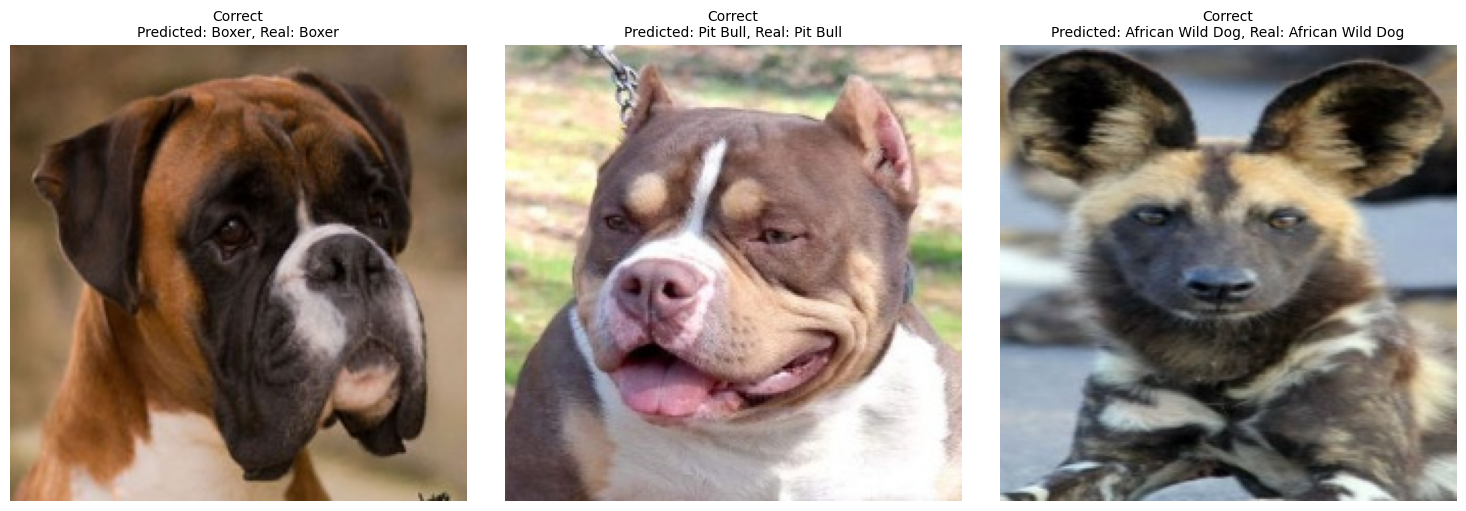

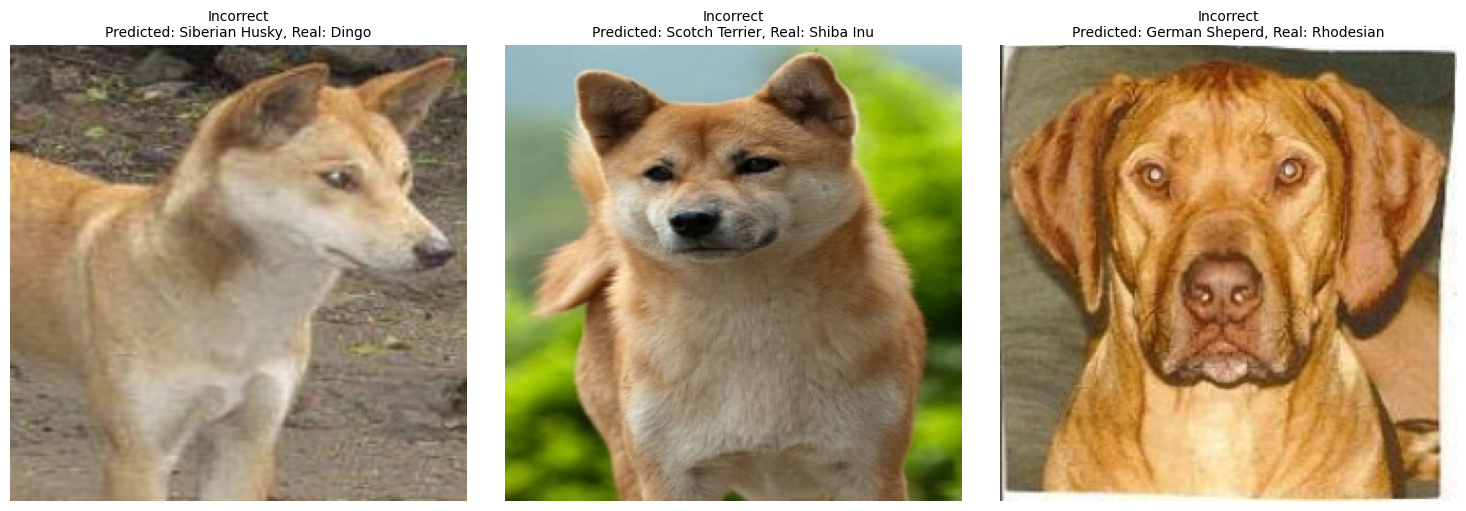

In [16]:
# Get predictions on test set
predictions = model.predict(test_generator, steps=np.ceil(test_generator.samples / test_generator.batch_size))

# Get indexes of predicted classes
predicted_classes = np.argmax(predictions, axis=1)

# Get the true classes from the test set
true_classes = test_generator.classes
true_classes = true_classes[:len(predicted_classes)]  # Adjust to match number of predictions

# Mapping indexes to class names
class_labels = list(test_generator.class_indices.keys())

# Modified function to plot images with class labels
def plot_images_with_labels(indices, is_correct):
    plt.figure(figsize=(15, 5))
    for i, idx in enumerate(indices):
        plt.subplot(1, 3, i + 1)
        # Path to image
        img_path = test_generator.filepaths[idx]
        img = load_img(img_path, target_size=(224, 224))  # Load and resize the image
        img_array = img_to_array(img) / 255.
        plt.imshow(img_array)
        # Class labels
        predicted_label = class_labels[predicted_classes[idx]]
        true_label = class_labels[true_classes[idx]]
        # Title
        title_text = f"{'Correct' if is_correct else 'Incorrect'}\nPredicted: {predicted_label}, Real: {true_label}"
        plt.title(title_text, fontsize=10)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Identification of correct and incorrect indexes
correct_indices = np.where(predicted_classes == true_classes)[0]
incorrect_indices = np.where(predicted_classes != true_classes)[0]

# Random selection of correct and incorrect examples
correct_sample_indices = np.random.choice(correct_indices, 3, replace=False) if len(correct_indices) >= 3 else correct_indices
incorrect_sample_indices = np.random.choice(incorrect_indices, 3, replace=False) if len(incorrect_indices) >= 3 else incorrect_indices

# Plot
plot_images_with_labels(correct_sample_indices, is_correct=True)
plot_images_with_labels(incorrect_sample_indices, is_correct=False)

Above were plotted a few examples of how the model classified some images, both correctly and incorrectly!

### __Conclusion__

Throughout this comprehensive exploration of building, training, and fine-tuning a deep learning model for dog breed classification, several stages of development and evaluation have demonstrated the model's effectiveness and robust generalization capabilities. The model's journey from initialization, through training and fine-tuning phases, to its final evaluation on a test set offers valuable insights into the process of developing a high-performing image classification model using transfer learning with MobileNetV2 and TensorFlow's data augmentation techniques.

Initial Training and Validation Phases:
The initial training phase showed a promising start, with substantial accuracy improvements as the epochs progressed. The use of data augmentation techniques and the strategic leveraging of MobileNetV2's pre-trained weights provided a strong foundation. The validation results were consistently high, indicating effective learning and generalization from the start, though slight fluctuations in validation loss suggested areas for careful monitoring and adjustment.

Fine-tuning for Enhanced Performance:
The decision to fine-tune the model by making later layers trainable and adjusting the learning rate was pivotal. This phase saw further improvements in accuracy and a reduction in loss, illustrating the model's increased specialization and improved capability to distinguish among various dog breeds. The fine-tuning process underscored the value of tailoring the pre-trained model more closely to the specific dataset, enhancing its predictive accuracy.

Test Set Evaluation:
The model's evaluation on the test set was particularly noteworthy, with a test accuracy of 95.43% and a test loss of 0.1386. These results highlight the model's excellent ability to generalize to new, unseen data, marking the success of the development process and confirming the effectiveness of the chosen methodologies in addressing potential overfitting while maintaining high performance.

Conclusion:
This project's success demonstrates the power of combining transfer learning with effective data augmentation and fine-tuning strategies in building a model that not only learns well from its training data but also generalizes effectively to new, unseen data. The high accuracy and low loss achieved in the test set evaluation speak to the model's potential for practical application in the field of dog breed classification.

Future directions could include exploring more advanced data augmentation techniques, experimenting with different architectures or pre-trained models, and expanding the dataset to include a wider variety of dog breeds. Additionally, the model's framework could be adapted to other image classification tasks, leveraging the robust approach and methodologies refined throughout this project. Overall, the project exemplifies the iterative process of model development, showcasing how careful planning, execution, and refinement can lead to the creation of a highly effective and generalizable deep learning model.